# Hypothesis Testing

In [1]:
from data.create_data import *
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [2]:
data = read_frmgham()
clean_data = data.dropna(subset=['sysbp', 'diabp'])
sysbp = clean_data.sysbp
diabp = clean_data.diabp

### Hypothesis Testing
Hypothesis Testing is the process of determining whether an apparent effect is statistically significant. In other words, it's a framework that determines whether the observed data deviates from what is expected.

### Research Questions
1. (**One-Sample Hypothesis Test**) Are the apparent effects of blood pressure we see in the sample likely to appear in a larger population?
2. (**Two-Sample Hypothesis Test**) Is the effect (difference in smoking status) statistically significant on blood pressure? In other words, do study sample means between smoking status (smokers and non-smokers) point to the same population?
  * *Supplement Question*: Are the effects found from prior exploratory data analyses (smokers have slightly lower systolic and diastolic blood pressures) likely to appear in the large population?
3. (**One-Tailed Hypothesis Test**) Are the effects (*lower systolic and diastolic blood pressures of smokers*) statistically significant?

### Assumptions
**Central Limit Theorem**:  
The large sample size of the dataset enables the sampling distribution of the mean to be approximately normally distributed. Thus, enabling hypothesis testing despite knowing the population parameters or not.

## One-Sample Hypothesis Tests
A one-sample hypothesis test determines if elements of the population can be statistically inferred from a random sample.  

**Note**: The z-score and t-score are approximately equal due to the large sample size of the dataset (`n > 30`).  

### Systolic Blood Pressure

1) Hypotheses
   * **H<sub>0</sub>**: The sample mean Systolic Blood Pressure (`sysbp`) points to the population mean, where μ = 120.
   * **H<sub>A</sub>**: The sample mean Systolic Blood Pressure (`sysbp`) does not point to the population mean, where μ ≠ 120.
   
2) Compute **t-score** & **p-value**.

In [3]:
sysbp_t, sysbp_pval = stats.ttest_1samp(sysbp, 120)
print "T-score = %.2f" % sysbp_t
print "p-value = %.2f" % sysbp_pval

T-score = 77.21
p-value = 0.00


##### Summary Statistics
Additional statistics about the sample.

In [4]:
print "Sample Size (n) = %d" % sysbp.shape[0]
print "Sample Mean (X-bar) = %.2f mmHg" % sysbp.mean()
print "Sample Standard Deviation (s) = %.2f" % sysbp.std()
sysbp_ci = stats.norm.interval(0.95, loc = sysbp.mean(), scale=sysbp.std()/math.sqrt(len(sysbp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (sysbp_ci)
print
print "Hypothesized Sample Mean (μ) = 120 mmHg"
print "Level of significance (α) = 0.05"

Sample Size (n) = 11627
Sample Mean (X-bar) = 136.32 mmHg
Sample Standard Deviation (s) = 22.80
95% Confidence Interval = [135.91, 136.74]

Hypothesized Sample Mean (μ) = 120 mmHg
Level of significance (α) = 0.05


3) Results  
  * test-statistic: **T-score** = 77.21
  * **p-value** = 0.00 

The **p-value** is < 0.05, providing substantial evidence against the null hypothesis (H<sub>0</sub>). Thus, H<sub>0</sub> is rejected in favor of the alternative hypothesis (H<sub>A</sub>).

The sample mean deviates from H<sub>0</sub> by 77.21 and it's expected that we'd expect to see the data as extreme as our sample due to chance about 0% of the time, given a true H<sub>0</sub>.

##### Conclusion
`μ ≠ 120`

Based on our sample, there is a statistically significant difference between the mean systolic blood pressure in our sample and hypothesized value.

### Diatolic Blood Pressure

1) Hypotheses
   * **H<sub>0</sub>**: The sample mean Diastolic Blood Pressure (`diabp`) points to the population mean, where μ = 82.95.
   * **H<sub>A</sub>**: The sample mean Diatolic Blood Pressure (`diabp`) does not point to the population mean, where μ ≠ 82.95.
   
2) Compute **t-score** & **p-value**.

In [5]:
diabp_t, diabp_pval = stats.ttest_1samp(diabp, 82.95)
print "T-score = %.2f" % diabp_t
print "p-value = %.2f" % diabp_pval

T-score = 0.81
p-value = 0.42


##### Summary Statistics
Additional statistics about the sample.

In [6]:
print "Sample Size (n) = %d" % diabp.shape[0]
print "Sample Mean (X-bar) = %.2f mmHg" % diabp.mean()
print "Sample Standard Deviation (s) = %.2f" % diabp.std()
diabp_ci = stats.norm.interval(0.95, loc = diabp.mean(), scale=diabp.std()/math.sqrt(len(sysbp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (diabp_ci)
print
print "Hypothesized Sample Mean (μ) = 80 mmHg"
print "Level of significance (α) = 0.05"

Sample Size (n) = 11627
Sample Mean (X-bar) = 83.04 mmHg
Sample Standard Deviation (s) = 11.66
95% Confidence Interval = [82.83, 83.25]

Hypothesized Sample Mean (μ) = 80 mmHg
Level of significance (α) = 0.05


3) Results  
  * test-statistic: **T-score** = 0.81
  * **p-value** = 0.42 

The **p-value** is large (p-value > 0.05), providing weak evidence against the null hypothesis (H<sub>0</sub>). Thus, H<sub>0</sub> cannot be rejected.

The sample mean deviates from H<sub>0</sub> by 0.81 and it's expected that we'd expect to see the data as extreme as our sample due to chance about 42% of the time, given a true H<sub>0</sub>.

##### Conclusion
`μ = 82.95`

Based on our sample, there is not a statistically significant difference between the mean diatolic blood pressure in our sample and hypothesized value.

## Two-Sample Hypothesis Test
A two-sample hypothesis test compares two independent samples to see what extent they come from a population with the same mean.

### Smoking Status
Smoking Status (`cursmoke`):
 * `0`: non-current smoker
 * `1`: current smoker

In [7]:
non = clean_data[clean_data.cursmoke==0] 
cur = clean_data[clean_data.cursmoke!=0]

#### Exploratory Data Analyses
(*Please refer to previous IPython Notebook*)  
Prior exploratory data analyses illustrated that smokers tend to have lower systolic and diastolic blood pressure than non-smokers. 

**Fundamental Question**: Are these effects that we see in the sample likely to appear in the larger population?
  * Solution: Two-sample Hypothesis Tests

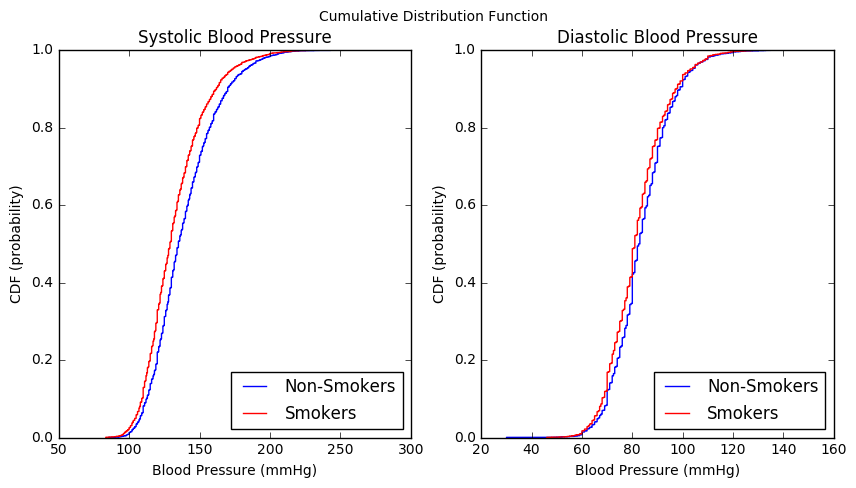

In [8]:
# CDF Systolic BP
cdf_nonsys = ECDF(non.sysbp)
cdf_cursys = ECDF(cur.sysbp)

# CDF Systolic BP
cdf_nondia = ECDF(non.diabp)
cdf_curdia = ECDF(cur.diabp)

# Plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.step(cdf_nonsys.x, cdf_nonsys.y, color='b', 
         label='Non-Smokers')
plt.step(cdf_cursys.x, cdf_cursys.y, color='r', 
         label='Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF (probability)')
plt.title('Systolic Blood Pressure')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.step(cdf_nondia.x, cdf_nondia.y, color='b', 
         label='Non-Smokers')
plt.step(cdf_curdia.x, cdf_curdia.y, color='r', 
         label='Smokers')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('CDF (probability)')
plt.title('Diastolic Blood Pressure')
plt.legend(loc='lower right')
plt.suptitle('Cumulative Distribution Function')
plt.show()

#### Systolic Blood Pressure

In [9]:
non_sysbp = non.sysbp
cur_sysbp = cur.sysbp

1) Hypotheses  
  * **H<sub>0</sub>**: The means of both study samples (sample mean systolic blood pressure among non-smokers and smokers) point to the same population, where μ<sub>1</sub> = μ<sub>2</sub>.
  * **H<sub>A</sub>**: The means of both study samples (sample mean systolic blood pressure among non-smokers and smokers) do not point to the same population, where μ<sub>1</sub> ≠ μ<sub>2</sub>.
  
2.) Compute the **t-score** and **p-value**.

In [10]:
sysbp_t, sysbp_p = stats.ttest_ind(non_sysbp, cur_sysbp)
print "The t-score is %.2f and p-value is %.2f" % (sysbp_t, sysbp_p)

The t-score is 15.33 and p-value is 0.00


##### Summary Statistics
Additional statistics about the sample.

In [11]:
print "Group 1: Non-Current Smokers (0)"
print "---------------------------------"
print "Sample Size (n1) = %d" % non_sysbp.shape[0]
print "Sample Mean (X-bar1) = %.2f mmHg" % non_sysbp.mean()
print "Sample Standard Deviation (s1) = %.2f" % non_sysbp.std()
nonsysbp_ci = stats.norm.interval(0.95, loc = non_sysbp.mean(), scale=non_sysbp.std()/math.sqrt(len(non_sysbp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (nonsysbp_ci)
print
print "Group 2: Current Smokers (1)"
print "---------------------------------"

print "Sample Size (n2) = %d" % cur_sysbp.shape[0]
print "Sample Mean (X-bar2) = %.2f mmHg" % cur_sysbp.mean()
print "Sample Standard Deviation (s2) = %.2f" % cur_sysbp.std()
cursysbp_ci = stats.norm.interval(0.95, loc = cur_sysbp.mean(), scale=cur_sysbp.std()/math.sqrt(len(cur_sysbp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (cursysbp_ci)
print
print "Combined"
print "---------------------------------"
print "Sample Size (n1+2) = %d" % sysbp.shape[0]
print "Sample Mean (X-bar1+2) = %.2f mmHg" % sysbp.mean() 
print "Sample Standard Deviation (s1+2) = %.2f" % sysbp.std()
sysbp_ci = stats.norm.interval(0.95, loc = sysbp.mean(), scale=sysbp.std()/math.sqrt(len(sysbp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (sysbp_ci)
print
print "Differences"
print "---------------------------------"
print "Sample Mean (X-bar2-1) = %.2f mmHg" % abs(cur_sysbp.mean() - non_sysbp.mean())
print
print "Level of significance (α) = 0.05"

Group 1: Non-Current Smokers (0)
---------------------------------
Sample Size (n1) = 6598
Sample Mean (X-bar1) = 139.13 mmHg
Sample Standard Deviation (s1) = 23.18
95% Confidence Interval = [138.57, 139.69]

Group 2: Current Smokers (1)
---------------------------------
Sample Size (n2) = 5029
Sample Mean (X-bar2) = 132.65 mmHg
Sample Standard Deviation (s2) = 21.75
95% Confidence Interval = [132.05, 133.25]

Combined
---------------------------------
Sample Size (n1+2) = 11627
Sample Mean (X-bar1+2) = 136.32 mmHg
Sample Standard Deviation (s1+2) = 22.80
95% Confidence Interval = [135.91, 136.74]

Differences
---------------------------------
Sample Mean (X-bar2-1) = 6.48 mmHg

Level of significance (α) = 0.05


3) Results  
  * test-statistic: **T-score** = 15.33
  * **p-value** = 0.00 

The **p-value** is very small (p-value < 0.05), providing strong evidence against the null hypothesis (H<sub>0</sub>). Thus, H<sub>0</sub> is rejected in favor of H<sub>A</sub>.

There is a 0% chance of seeing this large of a difference between samples (non-smokers and smokers) be due to  chance.

##### Conclusion
`μ`<sub>1</sub>` ≠ μ`<sub>2</sub>

Based on our sample, it is not likely that the two smaple means (non-current and current smokers systolic blood pressure) point to the same population. The null hypothesis is rejected, determining that there is indeed a statistically significant difference in systolic blood pressure based on smoking status.

#### Diastolic Blood Pressure

In [12]:
non_diabp = non.diabp
cur_diabp = cur.diabp

1) Hypotheses  
  * **H<sub>0</sub>**: The means of both study samples (sample mean diastolic blood pressure among non-smokers and smokers) point to the same population, where μ<sub>1</sub> = μ<sub>2</sub>.
  * **H<sub>A</sub>**: The means of both study samples (sample mean diastolic blood pressure among non-smokers and smokers) do not point to the same population, where μ<sub>1</sub> ≠ μ<sub>2</sub>.
  
2.) Compute the **t-score** and **p-value**.

In [13]:
diabp_t, diabp_p = stats.ttest_ind(non_diabp, cur_diabp)
print "The t-score is %.2f and p-value is %.2f" % (diabp_t, diabp_p)

The t-score is 8.21 and p-value is 0.00


##### Summary Statistics
Additional statistics about the sample.

In [14]:
print "Group 1: Non-Current Smokers (0)"
print "---------------------------------"
print "Sample Size (n1) = %d" % non_diabp.shape[0]
print "Sample Mean (X-bar1) = %.2f mmHg" % non_diabp.mean()
print "Sample Standard Deviation (s1) = %.2f" % non_diabp.std()
nondiabp_ci = stats.norm.interval(0.95, loc = non_diabp.mean(), scale=non_diabp.std()/math.sqrt(len(non_diabp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (nondiabp_ci)
print
print "Group 2: Current Smokers (1)"
print "---------------------------------"

print "Sample Size (n2) = %d" % cur_diabp.shape[0]
print "Sample Mean (X-bar2) = %.2f mmHg" % cur_diabp.mean()
print "Sample Standard Deviation (s2) = %.2f" % cur_diabp.std()
curdiabp_ci = stats.norm.interval(0.95, loc = cur_diabp.mean(), scale=cur_diabp.std()/math.sqrt(len(cur_diabp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (curdiabp_ci)
print
print "Combined"
print "---------------------------------"
print "Sample Size (n1+2) = %d" % diabp.shape[0]
print "Sample Mean (X-bar1+2) = %.2f mmHg" % diabp.mean() 
print "Sample Standard Deviation (s1+2) = %.2f" % diabp.std()
diabp_ci = stats.norm.interval(0.95, loc = diabp.mean(), scale=diabp.std()/math.sqrt(len(diabp)))
print "95" + "%" + " Confidence Interval = [%.2f, %.2f]" % (diabp_ci)
print
print "Differences"
print "---------------------------------"
print "Sample Mean (X-bar2-1) = %.2f mmHg" % abs(cur_diabp.mean() - non_diabp.mean())
print
print "Level of significance (α) = 0.05"

Group 1: Non-Current Smokers (0)
---------------------------------
Sample Size (n1) = 6598
Sample Mean (X-bar1) = 83.81 mmHg
Sample Standard Deviation (s1) = 11.58
95% Confidence Interval = [83.53, 84.09]

Group 2: Current Smokers (1)
---------------------------------
Sample Size (n2) = 5029
Sample Mean (X-bar2) = 82.02 mmHg
Sample Standard Deviation (s2) = 11.68
95% Confidence Interval = [81.70, 82.35]

Combined
---------------------------------
Sample Size (n1+2) = 11627
Sample Mean (X-bar1+2) = 83.04 mmHg
Sample Standard Deviation (s1+2) = 11.66
95% Confidence Interval = [82.83, 83.25]

Differences
---------------------------------
Sample Mean (X-bar2-1) = 1.79 mmHg

Level of significance (α) = 0.05


3) Results  
  * test-statistic: **T-score** = 8.21
  * **p-value** = 0.00 

The **p-value** is very small (p-value < 0.05), providing strong evidence against the null hypothesis (H<sub>0</sub>). Thus, H<sub>0</sub> is rejected in favor of H<sub>A</sub>.

There is a 0% chance of seeing this large of a difference between samples (non-smokers and smokers) be due to  chance.

##### Conclusion
`μ`<sub>1</sub>` ≠ μ`<sub>2</sub>

Based on our sample, it is not likely that the two smaple means (non-current and current smokers diastolic blood pressure) point to the same population. The null hypothesis is rejected, determining that there is indeed a statistically significant difference in diatolic blood pressure based on smoking status.

## One-Tail Hypothesis Test
One-tailed hypothesis tests test for the possibility of the relationship in *one direction*, disregarding the possibility of a relationship in the other direction. By testing a more specific hypothesis, provides more poer to detect an effect in the direction.

Only 1 side of the distribution is accounted for. All of the significance level is alloted to that direction of interest.

### Smoker's *Lower* Systolic Blood Pressure

1) Hypotheses  
  * **H<sub>0</sub>**: The means of both study samples (non-smokers and smokers) point to the same population, where μ<sub>1</sub> = μ<sub>2</sub>.
  * **H<sub>A</sub>**: The means of both study samples do not point to the same population, where μ<sub>1</sub> ≠ μ<sub>2</sub>. 
    * Smokers are more likely to have lower systolic blood pressure.
  
2.) Compute the **t-score** and **p-value**.

In [15]:
sysbp_t, sysbp_p = stats.ttest_ind(non_sysbp, cur_sysbp)
print "The t-score is %.2f and p-value (one-tail) is %.2f" % (sysbp_t, sysbp_p/2.0)

The t-score is 15.33 and p-value (one-tail) is 0.00


3) Results  
  * **t-score (15.33) > 0**
  * **p-value (0) ≤  0.05**  

Despite a low p-value, the t-score is greater than 0. Thus, the null hypothesis cannot be rejected. The difference is *not* statistically significant. Smokers with lower systolic blood pressure point to the same population as non-smokers.

### Smoker's *Lower* Diatolic Blood Pressure

1) Hypotheses  
  * **H<sub>0</sub>**: The means of both study samples (non-smokers and smokers) point to the same population, where μ<sub>1</sub> = μ<sub>2</sub>.
  * **H<sub>A</sub>**: The means of both study samples do not point to the same population, where μ<sub>1</sub> ≠ μ<sub>2</sub>. 
    * Smokers are more likely to have lower systolic blood pressure.
  
2.) Compute the **t-score** and **p-value**.

In [16]:
diabp_t, diabp_p = stats.ttest_ind(non_diabp, cur_diabp)
print "The t-score is %.2f and p-value (one-tail) is %.2f" % (diabp_t, diabp_p/2.0)

The t-score is 8.21 and p-value (one-tail) is 0.00


3) Results  
  * **t-score (8.21) > 0**
  * **p-value (0) ≤  0.05**  

Despite a low p-value, the t-score is greater than 0. Thus, the null hypothesis cannot be rejected. The difference is *not* statistically significant. Smokers with lower diatolic blood pressure point to the same population as non-smokers.

# Considerations: Errors
In classic hypothesis testing, an affect is considered * statistically significant* if the p-value is below some threshold (`α=0.05`).

## Type I Error (False Positive Rate)
The **False Positive Rate** is the probability of incorrectly considering an effect significant. 
  * Rejecting H<sub>0</sub> when it's actually true. Thus, concluding that an effect is real when it's not and is actually due to chance.

The False Positive Rate is equal to the level of significance (α). Thus, **FPR = 0.05**. You can expect a false positive 1 in 20 times when performing a hypothesis test.

## Type II Error (False Negative Rate)
The **False Negative Rate** is the probability of the hypothesis test failing, when the apparent effect is real. 
  * Failure to reject the H<sub>0</sub> when it's actually false. Thus, concluding that the effect is due to chance when it's not and is statistically significant.